<a href="https://colab.research.google.com/github/Aleksanderprofic/Machine-Learning/blob/master/LinearRegression/SimpleLinearRegression/sklearn/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Loading dataset and visualising data

### Loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Taking care of eventual missing values

In [2]:
number_of_rows = len(data)

for column in data:
    column_series = data[column]  
    number_of_correct_values = column_series.describe()['count']
    number_of_NaNs = number_of_correct_values - number_of_rows
    print(f"Number of missing values in {column}: {number_of_NaNs}")

Number of missing values in YearsExperience: 0.0
Number of missing values in Salary: 0.0


Dataset doesn't contain missing values

### Years of Experience vs Salary

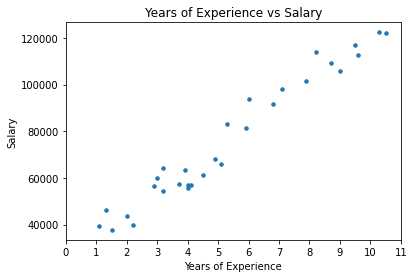

In [4]:
plt.scatter(data.YearsExperience, data.Salary, 12)
plt.xticks(range(12))
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [63]:
data.YearsExperience.corr(data.Salary)

0.9782416184887599

We can see that this relationship is linear and correlation is strong

## Data preprocessing

### Extracting data into dependent and independent variables

In [0]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Splitting data into the Training set and the Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training, predictions and visualisation of the results

### Fitting the model to the Training Set

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting salaries on the Test Set

In [60]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

print(np.concatenate(
    (y_pred.reshape(len(y_pred), 1),
     y_test.reshape(len(y_test), 1),
     (y_pred - y_test).reshape(len(y_pred), 1)), axis=1))

[[ 81781.77  81363.      418.77]
 [117982.34 112635.     5347.34]
 [ 36775.65  46205.    -9429.35]
 [ 64170.68  57081.     7089.68]
 [126787.88 121872.     4915.88]
 [ 75911.41  83088.    -7176.59]]


* 1st column - Predicted values
* 2nd column - Actual values
* 3rd column - Difference between Predicted and Actual values

### Visualising the training set results

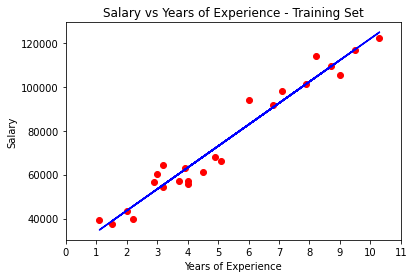

In [61]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Years of Experience - Training Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.xticks(range(12))
plt.show()

### Visualising the Test set results

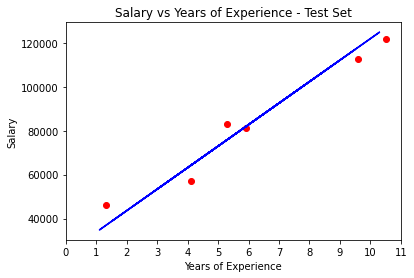

In [62]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Years of Experience - Test Set')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.xticks(range(12))
plt.show()